#The Sparks Foundation

##Task-3 Exploratry Data Analysis on SuperStore Dataset

##Author: Smruti Bhagat

##Problem Statement: Derive Business Problems by exploring the Data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Analyzing the dataset

In [3]:
#Loading the Dataset
superstore_data = pd.read_csv("C:/Users/SP/OneDrive/Desktop/Spark Internship/SampleSuperstore.csv")
print("Data loaded successfully")

superstore_data.head(10)

Data loaded successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
superstore_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Looking over the total sales as per category
top_categories = superstore_data.groupby("Category").Sales.sum().nlargest(n =10)
top_categories


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

In [14]:
#Looking over the total sales as per sub-category
top_sub_categories = superstore_data.groupby("Sub-Category").Sales.sum().nlargest(n =10)
top_sub_categories

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

##Exploratory Data Analysis

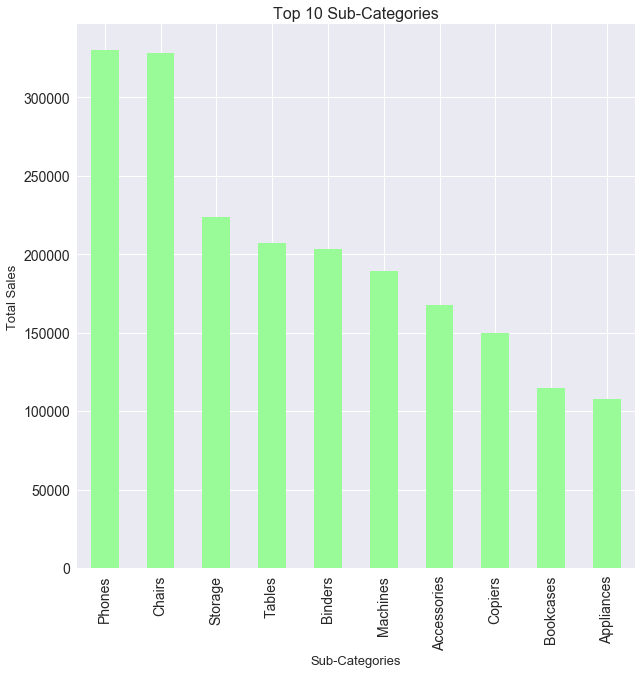

In [16]:
#Plot-1 Top 10 Sub categories based on overall sales
plt.style.use('seaborn')
top_sub_categories.plot(kind ='bar', figsize =(10,10), fontsize =14,color= 'palegreen')
plt.xlabel("Sub-Categories", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 Sub-Categories",fontsize =16)
plt.show()

<Figure size 432x432 with 0 Axes>

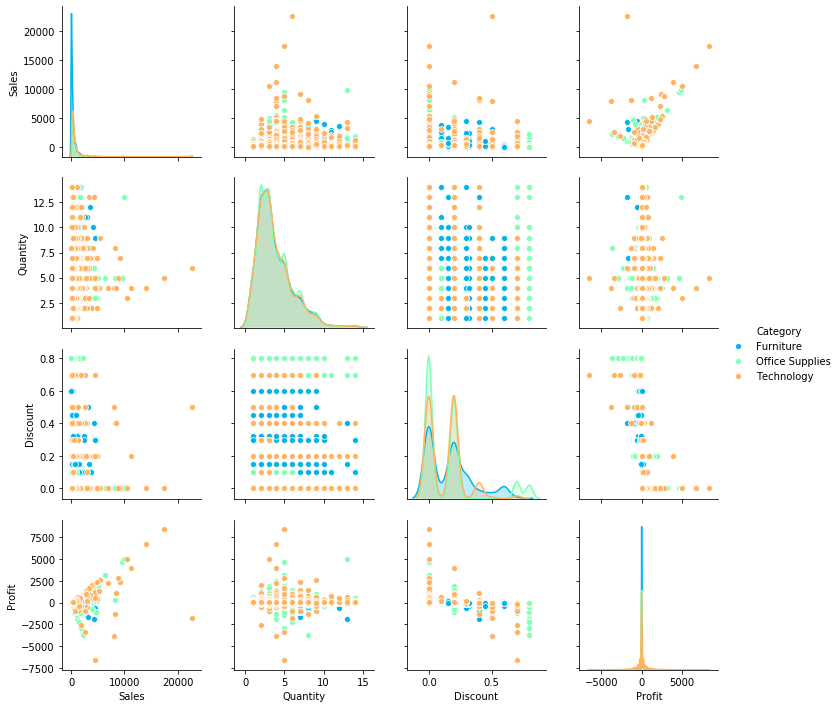

In [12]:
#Plot - 2 : Considering the co-relations between various attributess of the dataset
plt.figure(figsize=(6,6))
sns.pairplot(superstore_data.drop(columns = ['Country', 'Postal Code', 'City', 'Ship Mode'], axis = 1), palette='rainbow', hue='Category')
plt.show()

#Profit Based on Segment

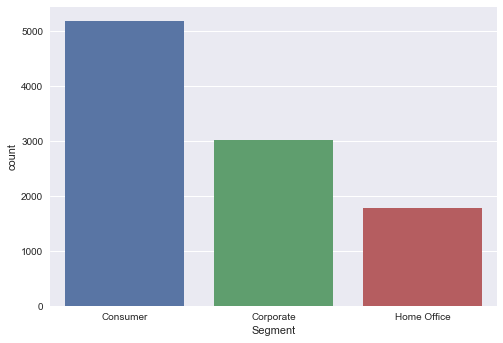

In [17]:
#Plot-3 : Profit Based on segments of the superstore
sns.countplot(superstore_data['Segment'])

In [21]:
Consumer_profit = superstore_data[superstore_data['Segment']=='Consumer'].Profit.sum()
print("Total profit earned by the Consumer Segment is :",Consumer_profit)

Corporate_profit = superstore_data[superstore_data['Segment']=='Corporate'].Profit.sum()
print("Total profit earned by the Corporate Segment is :",Corporate_profit)

HomeOffice_profit = superstore_data[superstore_data['Segment']=='Home Office'].Profit.sum()
print("Total profit earned by the Home Office Segment is :",HomeOffice_profit)

Total profit earned by the Consumer Segment is : 134119.2092
Total profit earned by the Corporate Segment is : 91979.13399999999
Total profit earned by the Home Office Segment is : 60298.678499999995


#Profit earned based on Shipping Mode

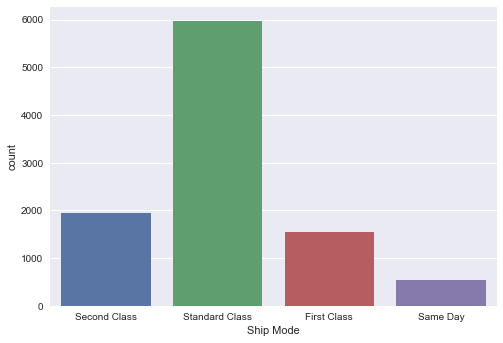

In [23]:
#Plot-4 : Profit Based on Shipping Modes offered by the superstore
sns.countplot(superstore_data['Ship Mode'])

In [24]:
SecondClass_profit = superstore_data[superstore_data['Ship Mode']=='Second Class'].Profit.sum()
print("Total profit earned by the Second Class Shipping mode is :",SecondClass_profit)

StandardClass_profit = superstore_data[superstore_data['Ship Mode']=='Standard Class'].Profit.sum()
print("Total profit earned by the Standard Class Shipping mode is :",StandardClass_profit)

FirstClass_profit = superstore_data[superstore_data['Ship Mode']=='First Class'].Profit.sum()
print("Total profit earned by the First Class Shipping mode is :",FirstClass_profit)

SameDay_profit = superstore_data[superstore_data['Ship Mode']=='Same Day'].Profit.sum()
print("Total profit earned by the Same Day Shipping mode is :",SameDay_profit)

Total profit earned by the Second Class Shipping mode is : 57446.63540000001
Total profit earned by the Standard Class Shipping mode is : 164088.7875
Total profit earned by the First Class Shipping mode is : 48969.8399
Total profit earned by the Same Day Shipping mode is : 15891.7589


#Profit earned based on the categories

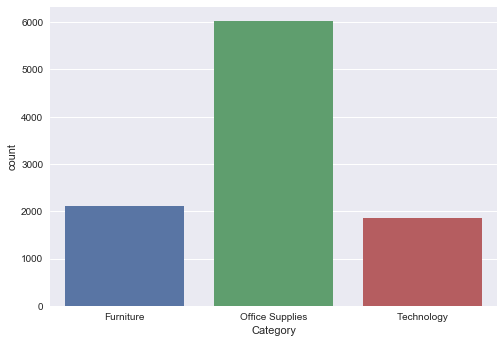

In [25]:
#Plot-5 : Profit Based on the Categories offered by the superstore
sns.countplot(superstore_data['Category'])

In [26]:
Furniture_profit = superstore_data[superstore_data['Category']=='Furniture'].Profit.sum()
print("Total profit earned by the Furniture Category is :",Furniture_profit)

OfficeSupplies_profit = superstore_data[superstore_data['Category']=='Office Supplies'].Profit.sum()
print("Total profit earned by the Office Supplies Category is :",OfficeSupplies_profit)

Technology_profit = superstore_data[superstore_data['Category']=='Technology'].Profit.sum()
print("Total profit earned by the Technology Category is :",Technology_profit)

Total profit earned by the Furniture Category is : 18451.272800000006
Total profit earned by the Office Supplies Category is : 122490.8008
Total profit earned by the Technology Category is : 145454.9481


# Analysing the effect of Discount on overall Profit

C:\Users\SP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


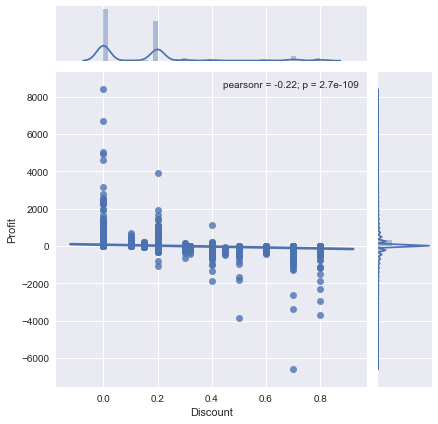

In [29]:
#Plot-6 : Effect of discount on overall profit
sns.jointplot(superstore_data['Discount'], superstore_data['Profit'], kind = "reg").annotate(stats.pearsonr)
plt.show()

## Conclusion
1. Phones and Chairs are the top most sold items
2. Considering profit based on Segment, the Consumer Segment earns the highest amount of profit as it als has maximum sale
3. The profit amount of Furniture is low similar to its overall sale by which it can be said that increasing the overall sale of furniture might lead to increase in profit
4. Considering the Shipping Modes most of the consumer prefer Standard Class delivery leading it to make the highest profit compared to other shipping modes.
5. The amount of discount provided does not affect the overall profit. Hence, strategies to emphasize on proper discount offers shoould be made to increase the profit of the store.